In [42]:
from IPython.display import display
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv(r'data/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [44]:
class LinearRegression:
    """使用python实现的线性回归。（梯度下降法）"""

    def __init__(self, alpha, times):
        """初始化方法
        Parameter
        -----
        alpha : float
            学习率。用来控制步长（权重调整的幅度）
        times ： int
            循环迭代的次数
        """
        self.alpha = alpha
        self.times = times

    def fit(self,X ,y):
        """根据提供的训练数据，对模型进行训练。
        Parameter
        -----
        X:类数组类型。形状：[样本数量，特征数量]
            待训练的样本特征属性(特征矩阵)
        y:类数组类型。形状：[样本数量]
            目标值（标签信息）
        """
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，初始值为0（或任何其他的值）。
        # 长度比特征数量多1.（多出的值就是截距）
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表，用来保存每次迭代后的损失值。
        # 损失值计算：（预测值-真实值）的平方和/2
        self.loss_ = []

        # 进行循环，多次迭代。在每次迭代过程中，不断的去调整权重值。
        # 使损失值逐渐减小
        for i in range(self.times):
            # 计算预测值
            y_hat = np.dot(X, self.w_[1:])+self.w_[0]
            # 计算真实值与预测值之间的差距
            error = y-y_hat
            # 将损失值加入到损失列表中
            self.loss_.append(np.sum(error ** 2)/2)
            # 根据差距调整权重w_
            # 根据公式：调整为 权重(j) = 权重(j)+学习率*sum((y-y_hat)*x(j))
            self.w_[0] += self.alpha * np.sum(error)
            self.w_[1:] += self.alpha * np.dot(X.T, error)

    def predict(self, X):
            """
            根据参数传递的样本，对样本数据进行预测
            :param X: 类数组类型，形状[样本数量，特征数量]
                待测试的样本
            :return:
                result：数组类型。
                    预测结果。
            """
            X = np.asarray(X)
            result = np.dot(X, self.w_[1:]) + self.w_[0]
            return result

In [45]:
lr = LinearRegression(alpha=0.001, times=20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]

test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

In [46]:
lr.fit(train_X, train_y)
result = lr.predict(test_X)

In [47]:
display(np.mean((result - test_y)**2))

2.7792610312582322e+206

In [48]:
display(lr.w_)

array([-5.15815437e+097, -2.35129668e+098, -5.12271010e+098,
       -6.15620083e+098, -3.48216580e+096, -2.91420431e+097,
       -3.21570354e+098, -3.64827668e+099, -1.87750918e+098,
       -5.67511573e+098, -2.25826077e+100, -9.62208181e+098,
       -1.83486304e+100, -6.81203990e+098])

In [49]:
display(lr.loss_)

[116831.44,
 1408598249298613.5,
 2.172530154894361e+25,
 3.352806246430304e+35,
 5.174311325524107e+45,
 7.985399757645096e+55,
 1.2323690107576873e+66,
 1.9018877260624557e+76,
 2.9351410908353766e+86,
 4.529738062375704e+96,
 6.990644156017515e+106,
 1.0788505878953964e+117,
 1.6649661533699249e+127,
 2.5695052892126924e+137,
 3.965460449708662e+147,
 6.119807047769026e+157,
 9.44456230919539e+167,
 1.4575583268559415e+178,
 2.2494173966311435e+188,
 3.4714759135446417e+198]

In [50]:
class StandardScaler:
    """该类数据进行标准化处理"""
    def fit(self,X):
        """根据传递的样本，计算每个特征的均值与标准差
            Parameter
            ---------
            X:类数组类型
            训练数据，用来计算均值和标准差
        
        """
        X = np.asarray(X)
        self.std_ = np.std(X,axis=0)
        self.mean_ =  np.mean(X,axis=0)
        
    def transform(self,X):
        """对给定的数据X，进行标准化处理。（对X的每一列都变成标准正态分布的数据）
            Parameter
            ---------
            X:类数组类型
            待转换的数据
            
            returns
            ---------
            result:类数组类型
            参数X转换成标准正态分布后的结果
        
        """
        return (X - self.mean_) / self.std_
    
    def fit_transform(self,X):
        """大队数据进行训练，并转换，返回转换之后的结果
            Parameter
            ---------
            X:类数组类型
            待转换的数据
            
            returns
            ---------
            result:类数组类型
            参数X转换成标准正态分布后的结果
        
        """
        self.fit(X)
        return self.transform(X)
        

In [51]:
# 为了避免每个特征数量级的不同，从而在梯度下降的过程中带来影响
# 考虑对每个特征进行标准化处理
lr = LinearRegression(alpha=0.00005, times=200)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]

test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

In [52]:
# 对数据进行标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

In [53]:
lr.fit(train_X,train_y)
result = lr.predict(test_X)

In [54]:
display(np.mean((result - test_y)**2))

0.2037095737064436

In [55]:
display(lr.w_)

array([ 1.66788805e-16, -7.81199313e-02,  3.29442258e-02, -4.19910159e-02,
        7.28330245e-02, -1.21324567e-01,  3.18180059e-01, -9.34350543e-03,
       -2.07100721e-01,  1.02601461e-01, -5.27365740e-02, -1.81925829e-01,
        9.68880663e-02, -3.91846615e-01])

In [56]:
display(lr.loss_)

[200.0,
 181.08047461515912,
 165.95254212551558,
 153.77499014253908,
 143.89755418753072,
 135.8173556586534,
 129.1452890007622,
 123.58008518482981,
 118.88829787628536,
 114.88885930778778,
 111.44116197634688,
 108.43586076928271,
 105.78777412258123,
 103.43040477689789,
 101.31171022492376,
 99.39083744897944,
 97.63560174652662,
 96.02053974463445,
 94.52540551542103,
 93.13400864871988,
 91.83331624144965,
 90.61275858831738,
 89.4636921114215,
 88.37898367738946,
 87.3526886376934,
 86.37980124453725,
 85.45606096848586,
 84.57780200447036,
 83.74183615429958,
 82.94536151257353,
 82.18589111033205,
 81.4611970036955,
 80.76926632328876,
 80.10826659392032,
 79.47651824646539,
 78.87247271656567,
 78.29469488954777,
 77.74184893251439,
 77.21268677189023,
 76.70603864247548,
 76.22080526358964,
 75.75595129791154,
 75.31049982587123,
 74.88352762812822,
 74.47416111478566,
 74.08157277563765,
 73.70497805331533,
 73.34363256252786,
 72.99682959510919,
 72.66389786337885,
 72

In [57]:
# KNN可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
# 默认情况下，matplotlib不支持中文显示。需要设置
# 设置字体为黑体，以支持中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置在中文字体时，能够正常的显示负号(-)
mpl.rcParams['axes.unicode_minus'] = False

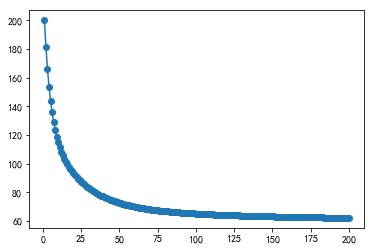

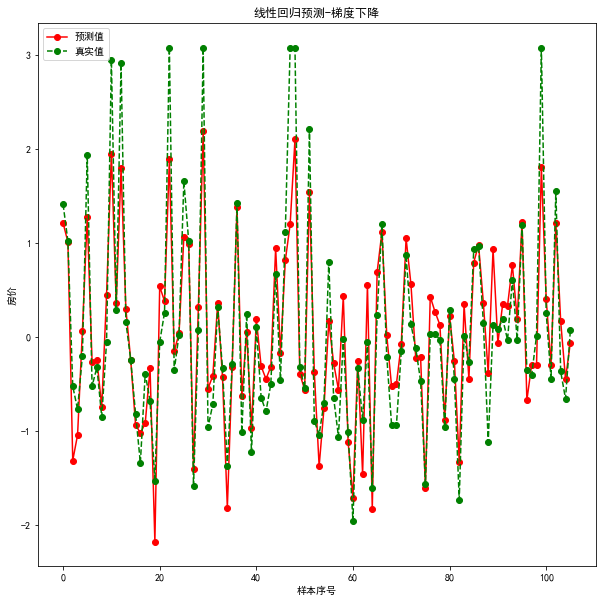

In [58]:
# 设置画布大小
plt.figure(figsize=(10,10))
# 绘制预测值
plt.plot(result,"ro-",label="预测值")
# 绘制真实值
plt.plot(test_y.values,"go--",label="真实值")

plt.title('线性回归预测-梯度下降')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.legend(loc='best')
plt.show()

In [59]:
# 绘制累计误差值
plt.plot(range(1, lr.times + 1) , lr.loss_ ,"o-")

In [60]:
# 因为房价分析涉及多个维度，不方便进行可视化显示，为了实现可视化
# 只选取其中一个维度(RM)，并逼出直线，实现拟合
lr = LinearRegression(alpha=0.0005, times=50)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, 5:6]
train_y = t.iloc[:400, -1]

test_X = t.iloc[400:, 5:6]
test_y = t.iloc[400:, -1]

In [61]:
# 对数据进行标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X,train_y)
result = lr.predict(test_X)

In [62]:
display(np.mean((result - test_y)**2))

0.46071758937162155

In [64]:
plt.scatter(train_X['RM'],train_y)
# 查看方程系数
display(lr.w_)
# 构建方程y=-3.03757020e-16 + 6.54984608e-01 * x
x = np.arange(-5,5,0.1)
y = -3.03757020e-16 + 6.54984608e-01 * x
plt.plot(x,y,"r")
plt.plot(x,lr.predict(x.reshape(-1,1)),"r")

array([-2.78221890e-16,  6.54984608e-01])